In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("diabetic_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# Dataset preparation
After reviewing the dataset description available at: [hindawi bio med research](https://www.hindawi.com/journals/bmri/2014/781670/tab1/) I discovered that missing values in the dataset are indicated by the symbol '?'. In order to ensure unbiased experimentation, features such as 'payer_code', 'weight', and 'medical_specialty', which contain a significant number of missing values, will be excluded during the dataset preparation process.
Additionally, 'patient_nbr' and 'encounter_id' will be removed from the dataset as they do not provide any valuable information for our analysis.

In [3]:
# missing values are representated with "?" in the dataset. so we will replace "?" with nan and sum
df = df.replace('?', np.nan)

# sum total number of missing values 
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [5]:
# drop uneeded columns from the data
df = df.drop(['weight', 'patient_nbr', 'encounter_id','payer_code', 'medical_specialty', 'admission_type_id', 'discharge_disposition_id','admission_source_id'], axis=1)

#print column names
print(df.columns.values)

['race' 'gender' 'age' 'time_in_hospital' 'num_lab_procedures'
 'num_procedures' 'num_medications' 'number_outpatient' 'number_emergency'
 'number_inpatient' 'diag_1' 'diag_2' 'diag_3' 'number_diagnoses'
 'max_glu_serum' 'A1Cresult' 'metformin' 'repaglinide' 'nateglinide'
 'chlorpropamide' 'glimepiride' 'acetohexamide' 'glipizide' 'glyburide'
 'tolbutamide' 'pioglitazone' 'rosiglitazone' 'acarbose' 'miglitol'
 'troglitazone' 'tolazamide' 'examide' 'citoglipton' 'insulin'
 'glyburide-metformin' 'glipizide-metformin' 'glimepiride-pioglitazone'
 'metformin-rosiglitazone' 'metformin-pioglitazone' 'change' 'diabetesMed'
 'readmitted']


In [6]:
# Fill missing values for race with the most common race
df['race'] = df['race'].fillna(df['race'].mode()[0])

# Fill missing values for all 3 diagnosis with 'unknown'
df[['diag_1', 'diag_2', 'diag_3']] = df[['diag_1', 'diag_2', 'diag_3']].fillna('unknown')

# Check for missing values again
df.isnull().sum()


race                        0
gender                      0
age                         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin   

In [18]:
import seaborn as sns

# visualizing relationship between numeric features and target. 

#num_vis = sns.pairplot(df[[ 'time_in_hospital','num_lab_procedures','num_procedures', 'num_medications', 'number_outpatient', 'number_emergency',
#                           'number_inpatient', 'number_diagnoses','change']], hue = 'change')#, height = 5, kind="reg")


In [ ]:
import matplotlib.pyplot as plt
""" 
categorical_variables = ['race', 'gender', 'age', 'time_in_hospital', 'max_glu_serum',
                         'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
                         'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
                         'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
                         'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'diabetesMed', 'readmitted', 'change']

for c in categorical_variables:
    ax = sns.countplot(x = c, data = df, palette = 'Set3', hue = 'change')
    for container in ax.containers:
        ax.bar_label(container)
    plt.xticks(rotation=45)
    plt.show()

"""
# note * diagnosis will not be plotted here because of too many feature instances

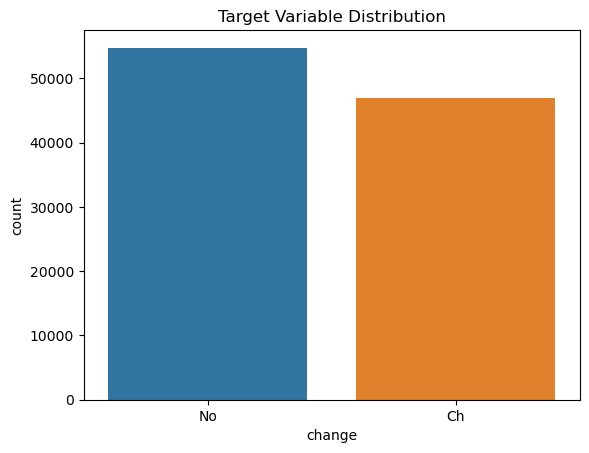

No    54755
Ch    47011
Name: change, dtype: int64


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# count and Visualize target variable distribution
count_target = df['change'].value_counts()

sns.countplot(x='change', data=df)
plt.title('Target Variable Distribution')
plt.show()

print(count_target)

In [20]:
from sklearn.preprocessing import LabelEncoder

# initialize label encoder
encoder = LabelEncoder()

# make a copy of the dataframe, Apply label encoding to categorical variables 'objects' in df 
df_copy = df.copy()
df_encoded = df_copy.apply(lambda col: encoder.fit_transform(col) if col.dtype == 'object' else col)

# print copied v of df which has been encoded
df_encoded.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2,0,0,1,41,0,1,0,0,0,...,0,1,1,0,0,0,0,1,0,2
1,2,0,1,3,59,0,18,0,0,0,...,0,3,1,0,0,0,0,0,1,1
2,0,0,2,2,11,5,13,2,0,1,...,0,1,1,0,0,0,0,1,1,2
3,2,1,3,2,44,1,16,0,0,0,...,0,3,1,0,0,0,0,0,1,2
4,2,1,4,1,51,0,8,0,0,0,...,0,2,1,0,0,0,0,0,1,2


In [24]:
from sklearn.ensemble import RandomForestClassifier

# Define feature set and target variable
rfc_X = df_encoded.drop('change', axis=1) # features
rfc_y = df_encoded['change']   # target 

# create a RandomForestClassifier instance 
clf = RandomForestClassifier()
clf.fit(rfc_X, rfc_y)

# extract feature importances
importances = clf.feature_importances_

# Create a dataframe for visualization
feature_importances = pd.DataFrame({'feature': rfc_X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

feature_importances

,feature,importance
33,insulin,0.398281
39,diabetesMed,0.146695
16,metformin,0.090391
22,glipizide,0.052606
23,glyburide,0.052187
25,pioglitazone,0.036464
26,rosiglitazone,0.033436
6,num_medications,0.031035
20,glimepiride,0.022505
10,diag_1,0.015583


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

# Select best performing features to reduce dimensionality
important_features = feature_importances['feature'][:30].tolist()
X_important = rfc_X[important_features] # feature
rfc_y = df_encoded['change']   # target 

# split the dataset into 80% training and 20% testing   
dtc_X_train, dtc_X_test, dtc_y_train, dtc_y_test = train_test_split(X_important, rfc_y, test_size=0.2)

print(dtc_X_train.shape)
print(dtc_y_train.shape)

print(dtc_X_test.shape)
print(dtc_y_test.shape)


(81412, 30)
(81412,)
(20354, 30)
(20354,)


In [39]:
smote_dtc = SMOTE()
dtc_X_train_smote, dtc_y_train_smote = smote_dtc.fit_resample(dtc_X_train, dtc_y_train)

dtc = DecisionTreeClassifier()
dtc.fit(dtc_X_train_smote, dtc_y_train_smote)

# get predictions
dtc_prediction = dtc.predict(dtc_X_test)

# get probabilities of positive 
dtc_modelScore = dtc.predict_proba(dtc_X_test)[:, 1] # gets positive class
dtc_roc = roc_auc_score(dtc_y_test, dtc_modelScore)
print(f"rou-auc score for the decision tree model: {dtc_roc}")

# f1 score
dtc_f1 = f1_score(dtc_y_test, dtc_prediction)
print(f"f1 score for the decision tree model: {dtc_f1}")

# Recall
dtc_recall = recall_score(dtc_y_test, dtc_prediction)
print(f"recall: {dtc_recall}")

# Precision
dtc_precision = precision_score(dtc_y_test, dtc_prediction)
print(f"precision: {dtc_precision}")

dtc_cm = confusion_matrix(dtc_y_test, dtc_prediction)
print(f"confusion matrix: \n{dtc_cm}")

# calculate truepositive and falsepositive rate to plot 
dtc_Tpositive, dtc_Fpositive, _ = roc_curve(dtc_y_test, dtc_modelScore)


# predicting for when theres change in medication 'change'

rou-auc score for the decision tree model: 0.9769199825964672
f1 score for the decision tree model: 0.9765967365967366
recall: 0.9561803907248494
precision: 0.9979039634146342
confusion matrix: 
[[ 9378    22]
 [  480 10474]]


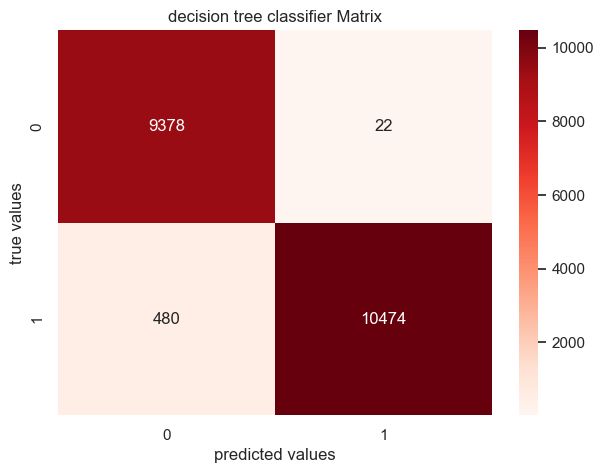

In [40]:
# Plot the DTC model confusion matrix 
plt.figure(figsize=(7,5))
sns.heatmap(dtc_cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('predicted values')
plt.ylabel('true values')
plt.title('decision tree classifier Matrix')
plt.show()

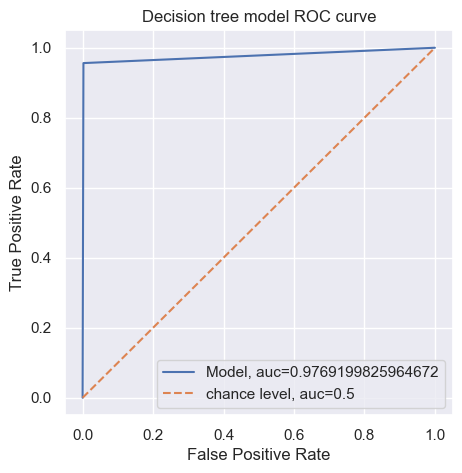

In [80]:
# model 1 rouc curve
plt.figure(figsize=(5,5))
plt.plot(dtc_Tpositive, dtc_Fpositive, label="Model, auc="+str(dtc_roc))
plt.plot([0, 1], [0, 1], linestyle='--', label="chance level, auc=0.5")  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision tree model ROC curve')
plt.legend(loc=4)
plt.show()

In [73]:
# plot the dtc tree 
#from sklearn import tree
#tree.plot_tree(dtc) 

##### we have quite a large tree so its difficult to make sense of it we can adjust the depth of the decision tree but that will affect the perfomance of our model.


# cross validation for decision tree model

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# perform 5 fold cross validation
dtc_5fold_precision = cross_val_score(dtc, X_important, rfc_y, cv=5, scoring=make_scorer(precision_score))
dtc_5fold_recall = cross_val_score(dtc, X_important, rfc_y, cv=5, scoring=make_scorer(recall_score))
dtc_f1_fold = cross_val_score(dtc, X_important, rfc_y, cv=5, scoring=make_scorer(f1_score))

print("five fold cross validation scores")
print("precsion:", dtc_5fold_precision)
print("recall: ", dtc_5fold_recall)
print("f1 ", dtc_f1_fold)

#i used make scorer because default socing is accuracy 
# general idea for this code is gotten from https://pieriantraining.com/understanding-cross-validation-in-scikit-learn-with-cross_validate/

five fold cross validation scores
precsion: [0.99817502 0.99899571 0.99881344 0.99926941 0.9998172 ]
recall:  [0.9994521  0.99908684 0.99963474 0.99917816 0.99881289]
f1  [0.99858531 0.99922399 0.99899571 0.99917808 0.9994519 ]


# model 2: KNN Classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier

# *note x_importance = feature importance
X_important = rfc_X[important_features] # feature
rfc_y = df_encoded['change']   # target 

#print(X_important.shape)
#print(rfc_y.shape)

knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(X_important, rfc_y, test_size=0.2)
#print('train set features:', knn_X_train.shape)
#print('train set target:', knn_y_train.shape)

#print('test set features:', knn_X_test.shape)
#print('test set features:', knn_y_test.shape)


train set features: (81412, 30)
train set target: (81412,)
test set features: (20354, 30)
test set features: (20354,)


In [49]:
knn_clf_3 = KNeighborsClassifier(n_neighbors=3)
knn_clf_3.fit(knn_X_train, knn_y_train)
knn_clf_3.score(knn_X_test, knn_y_test)

/Users/mercynwachukwu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.5597916871376634

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

# Fit the scaler to the training data
model_2X_train_scaled = scaler.fit_transform(knn_X_train)

# Transform the test
model_2X_test_scaled = scaler.transform(knn_X_test)

# fit model on scaled train data
knn_clf_5 = KNeighborsClassifier(n_neighbors=5)
knn_clf_5.fit(model_2X_train_scaled, knn_y_train)

# score on scaled data
knn_score = knn_clf_5.score(model_2X_test_scaled, knn_y_test)
#print("new score after scaling: ", knn_score)

knn_pred = knn_clf_5.predict(model_2X_test_scaled) # get predicted labels for model

knn2_pred = knn_clf_5.predict_proba(model_2X_test_scaled)[:,1]
knn2_roc_auc = roc_auc_score(knn_y_test, knn2_pred)
print("rouc-auc score:", {knn2_roc_auc})

# f1 score
knn2_f1 = f1_score(knn_y_test, knn_pred)
print(f"f1 score: {knn2_f1}")

# Recall
knn2_recall = recall_score(knn_y_test, knn_pred)
print(f"recall: {knn2_recall}")

# Precision
knn2_precision = precision_score(knn_y_test, knn_pred)
print(f"precision: {knn2_precision}")

knn2_cm = confusion_matrix(knn_y_test, knn_pred)
print(f"confusion matrix: \n{knn2_cm}")

knn_Tpositive2, knn_fpositive2, _ = roc_curve(knn_y_test, knn2_pred)


/Users/mercynwachukwu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/mercynwachukwu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

rouc-auc score: {0.9800277986434353}
f1 score: 0.9362002114910116
recall: 0.9768297168076499
precision: 0.8988155668358714
confusion matrix: 
[[ 8282  1196]
 [  252 10624]]


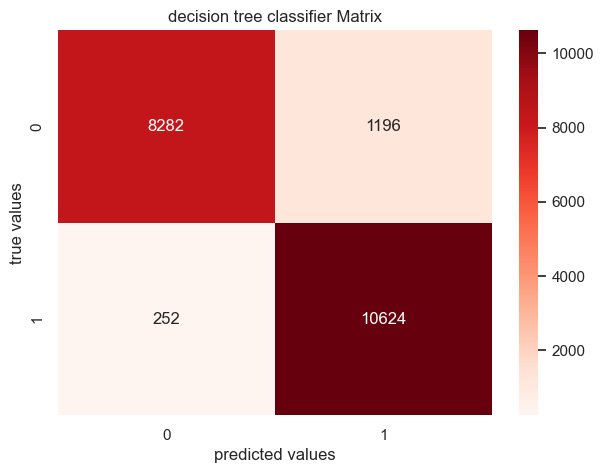

In [53]:
# confusion matrix for knn classifier 
# Plot the confusion matrix 
plt.figure(figsize=(7,5))
sns.heatmap(knn2_cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('predicted values')
plt.ylabel('true values')
plt.title('decision tree classifier Matrix')
plt.show()

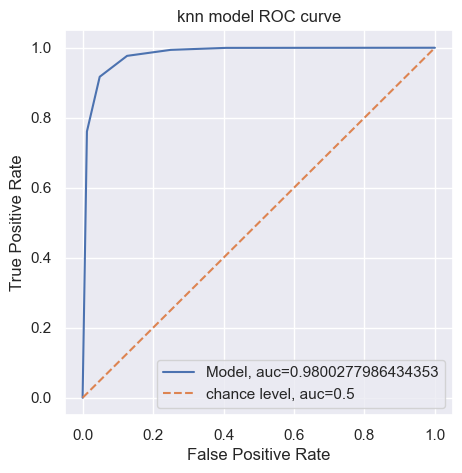

In [55]:
# model 2 rouc curve
plt.figure(figsize=(5,5))
plt.plot(knn_Tpositive2, knn_ypositive2, label="Model, auc="+str(model2_roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', label="chance level, auc=0.5")  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('knn model ROC curve')
plt.legend(loc=4)
plt.show()

# knn model cross validation 

In [ ]:
from sklearn.model_selection import GridSearchCV

# parameters for cross validation
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}


knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5) # 5fold cross validation

# Fit the GridSearchCV object to the data
grid_search.fit(model_2X_train_scaled, knn_y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

#results
#Best parameters:  {'n_neighbors': 7, 'weights': 'distance'}
#Best cross-validation score:  0.9213751951825131

# Random Forest Model

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# *note x_importance = feature importance
X_important = rfc_X[important_features] # feature
rfc_y = df_encoded['change'] # target


rfc_X_train, rfc_X_test, rfc_y_train, rfc_y_test = train_test_split(X_important, rfc_y, test_size = 0.2)

# class balancing 
knn_smote = SMOTE()
rfc_Xtrain_smote, rfc_ytrain_smote = knn_smote.fit_resample(rfc_X_train, rfc_y_train)

# initialize model
rfc = RandomForestClassifier()
rfc.fit(rfc_Xtrain_smote, rfc_ytrain_smote)

rfc_predict = rfc.predict(rfc_X_test)

rfc_accuracy = accuracy_score(rfc_y_test, rfc_predict)
print(f'random forest classifier accuracy score:', {rfc_accuracy})

rfc_y_proba = rfc.predict_proba(rfc_X_test)[:,1]

# ROC AUC score
rfc_roc_auc = roc_auc_score(rfc_y_test, rfc_y_proba)
print(f"Random forest classifier ROC AUC score: {rfc_roc_auc}")

# F1 score
rfc_f1 = f1_score(rfc_y_test, rfc_predict)
print(f"F1 score: {rfc_f1}")

# Recall
rfc_recall = recall_score(rfc_y_test, rfc_predict)
print(f"Recall: {rfc_recall}")

# Precision
rfc_precision = precision_score(rfc_y_test, rfc_predict)
print(f"Precision: {rfc_precision}")



# Confusion Matrix
rfc_cm = confusion_matrix(rfc_y_test, rfc_predict)
print(f"Confusion Matrix: \n{rfc_cm}")

# roc curve
rfc_Tpositives, rfc_Fpositives, _ = roc_curve(rfc_y_test, rfc_y_proba)


random forest classifier accuracy score: {0.9935639186400708}
Random forest classifier ROC AUC score: 0.9995825741682284
F1 score: 0.9940441009320299
Recall: 0.995265841223598
Precision: 0.9928253564617201
Confusion Matrix: 
[[ 9291    79]
 [   52 10932]]


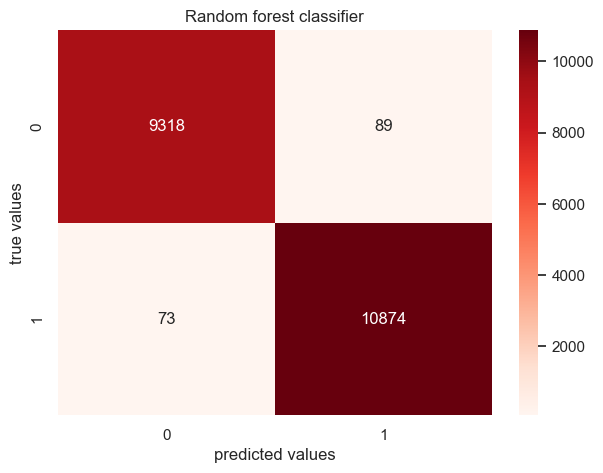

In [65]:
# Plot the confusion matrix 
plt.figure(figsize=(7,5))
sns.heatmap(rfc_cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('predicted values')
plt.ylabel('true values')
plt.title('Random forest classifier')
plt.show()

In [72]:
# cross validation
from sklearn.model_selection import GridSearchCV

# parameters for cross validation
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]}


rfc_clf = RandomForestClassifier()
grid_search = GridSearchCV(rfc_clf, param_grid, cv=5) # 5fold cross validation

# Fit the GridSearchCV object to the data
grid_search.fit(model_2X_train_scaled, knn_y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Best parameters:  {'max_depth': 20, 'n_estimators': 200}
# Best cross-validation score:  0.9946199538181617

Best parameters:  {'max_depth': 20, 'n_estimators': 200}
Best cross-validation score:  0.9946199538181617


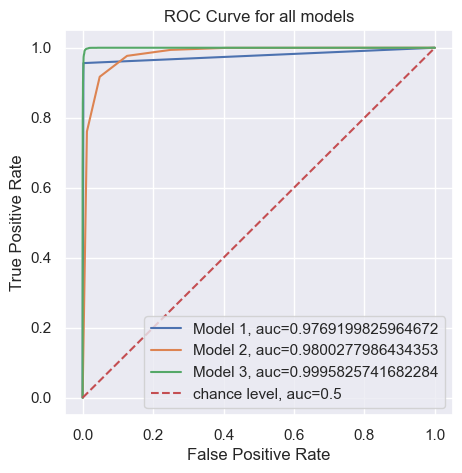

In [79]:
# model 1 rouc curve
plt.figure(figsize=(5,5))
plt.plot(dtc_Tpositive, dtc_Fpositive, label="Model 1, auc="+str(dtc_roc))
plt.plot(knn_Tpositive2, knn_fpositive2, label="Model 2, auc="+str(knn2_roc_auc))
plt.plot(rfc_Tpositives, rfc_Fpositives, label="Model 3, auc="+str(rfc_roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', label="chance level, auc=0.5")  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for all models')
plt.legend(loc=4)
plt.show()

# Refrences 

1. Analytics Vidhya. (2020, August 13). Types of Categorical Data Encoding. Retrieved from https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/
2. Swalin, A. (2018, Jan 1). How to Handle Missing Data. Towards Data Science. Retrieved from https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4
3. DataCamp. (n.d.). Random Forests Classifier in Python. DataCamp. Retrieved from https://www.datacamp.com/tutorial/random-forests-classifier-python
4. Pierian Training. (2023, April 13). Understanding Cross Validation in Scikit-Learn with cross_validate, Retrived from https://pieriantraining.com/understanding-cross-validation-in-scikit-learn-with-cross_validate/